
---
## Supvervised Learning
---

### Optional Recap: Regression
we start with a *supervised learning machine learning algorithm*: **Linear Regression**

**step 1:** import a model class from `sklearn`<br>
we import the LinearRegression class which allows us to instantiate linea models

In [2]:
from sklearn.linear_model import LinearRegression

**step 2:** intialize model with hyperparameters<br>
we set `fit_intercept`to `True` which tells to model to also learn a parameter for the `intercept`

In [3]:
model = LinearRegression(fit_intercept=True)

**step 3:** split data into `feature` matrix and `target` vector<br>
for this step we will create some toy data


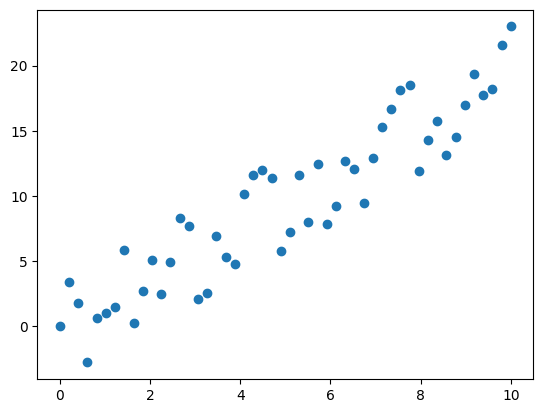

In [4]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

feature_x = np.linspace(start=0, stop=10, num=50)
target_y = 2 * feature_x + np.random.randint(low=-4, high=4, size=len(feature_x))

# model.fit will expect a 2d array for x, so we add a dummy dimension 
# so e.g. [1,2,3] becomes [[1], [2], [3]]
feature_x = np.expand_dims(feature_x, axis=1)

plt.scatter(feature_x, target_y);

**step 4:** fit the model to our data by callng the `fit()` method of the model.<br>
the parameters that our model learns are the `intercept` and `slope`(coefficient) of a linear function.

In [5]:
model.fit(feature_x, target_y)
model.coef_, model.intercept_

(array([1.98258824]), -0.43294117647058883)

**step 5:** Apply the model to new data.


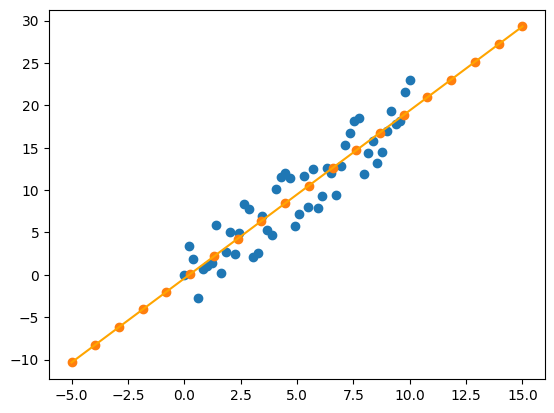

In [6]:
feature_x_new = np.linspace(start=-5, stop=15, num=20)
y_predicted = model.predict(np.expand_dims(feature_x_new, axis=-1))

plt.scatter(feature_x, target_y)
plt.scatter(feature_x_new, y_predicted);
plt.plot(feature_x_new, y_predicted, color="orange")

---
## Classificiation
---
### Decision Trees

**step 1:** import a model class from `sklearn`<br>

In [7]:
from sklearn.tree import DecisionTreeClassifier

**step 2:** intialize model with hyperparameters<br>


In [8]:
model = DecisionTreeClassifier()

**step 3:** split data into `feature` matrix and `target` vector<br>
for this step we will use flower data from sklearn


In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

**step 4:** fit the model to our data by callng the `fit()` method of the model.

In [10]:
model.fit(X, y);

**step 5:** Apply the model to "new" data.

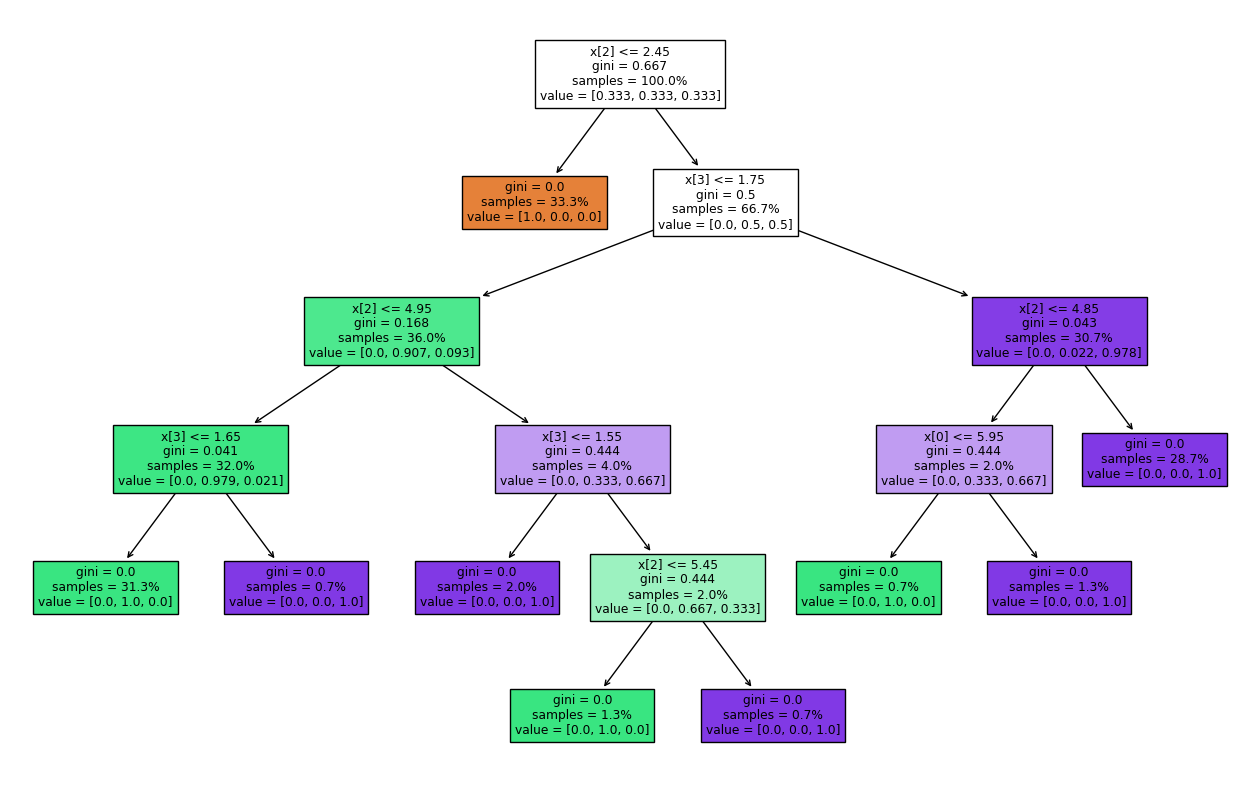

In [11]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,10))
plot_tree(model, filled=True, proportion=True);

In [12]:
model.predict([X[20]])

array([0])

In [13]:
y[20]

0

---
## K-nearest Neighbors

K-nearest Neighbors (knn) is a rather simple machine learning algorithm that can be used for regression and classification, though it is usually used as a classification algorithm.  

__How does it work?__  
The idea of knn is rather simple:  
To classify an unknown datapoint you look at the k nearest datapoints and assign it then to the class to which the most of its nearest neighbors belong.  
So imagine the following situation: you have some data about chocolate and strawberry ice cream. Chocolate as well as Strawberry icecream do have some connected features, for example the creamy consistency and the melting point. Now you are faced with an unknown cup of icecream with a specific melting point and creamy consistency and want to know whether it is more likely to be chocolate or strawberry ice cream.  
To decide this you are looking at the 5 datapoints that are closest to your creamy consisteny and melting point. If more of these datapoints are chocolate ice cream your cup of ice cream is likely to be chocolate ice cream. 

__How does it work?__
knn wants to classify unknown datapoints according to already existing datapoints.  
First of all we have the parameter k with which you specify the number of neighbors you include in your decision. Finding the right parameter for k is often the crux of knn. A method to test several different k values on one dataset is cross-validation, but more to that later.  
The _distance_ to the different points can be calculated with different measurements:
- the manhatten distance
- the euclidean distance
- the hamming distance  

[Here you can test out how the knn works](http://vision.stanford.edu/teaching/cs231n-demos/knn/)

__How to use knn in scikitlearn?__  
First of all we have a look at the dataset. Here we can already see that there are clusters that can be used for classification.

<Axes: xlabel='sepalWidth', ylabel='petalWidth'>

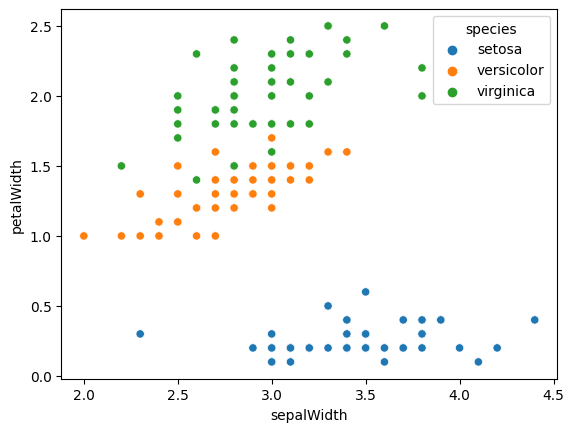

In [15]:
iris = pd.read_csv("data/iris.csv")
sns.scatterplot(data=iris, x="sepalWidth", y="petalWidth", hue="species")

For using the dataset in sklearn there is a useful function to load the iris dataset. With this function load data, we will get the data in a format that can be easily used for working with sklearn. 

In [16]:
from sklearn.datasets import load_iris
iris = load_iris()

In [17]:
# look at the data
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
# look at the column names
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
# look at the target values
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [20]:
# look at target names
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
# split dataset into data and target
X = iris.data
y = iris.target

Now we can apply the knn algorithm

In [22]:
# load knn
from sklearn.neighbors import KNeighborsClassifier

# use the model with k = 5
knn = KNeighborsClassifier(n_neighbors = 5)

In [25]:
knn.fit(X,y)

KNeighborsClassifier()

In [26]:
# test the result:
classes = {0: "setosa", 1: "versicolor", 2: "virginica"}
x_unknown = [[6,2.5, 4, 3]]
prediction = knn.predict(x_unknown)

classes[prediction[0]]

'virginica'